In [86]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import cv2

In [87]:
images = os.listdir("Train/Images/")

In [88]:
len(images)

304

In [89]:
train = pd.read_csv("Train/train.csv")

In [90]:
train

,ImageId,NameOfPokemon
0,296.jpg,Pikachu
1,297.jpg,Pikachu
2,298.jpg,Pikachu
3,299.jpg,Pikachu
4,300.jpg,Pikachu
5,301.jpg,Pikachu
6,302.jpg,Pikachu
7,303.jpg,Pikachu
8,304.jpg,Pikachu
9,305.jpg,Pikachu


In [91]:
dic= {
    0 : "Pikachu",
    1 : "Bulbasaur",
    2 : "Charmander"
}
reverse_dic= {
    "Pikachu" : 0,
    "Bulbasaur" : 1,
    "Charmander":2
}

In [92]:
X = []
Y = []

In [93]:
#forming our X and Y matrix[list]

for im in images:
    
    im_path ="Train/Images/"+im
    img = cv2.imread(im_path)
    img = cv2.resize(img, (100,100))
    X.append(img) # here X matrix is formed
    
    lab = reverse_dic[list(train[train['ImageId'] == im]['NameOfPokemon'])[0]]
    Y.append(lab) #here Y matrix is formed

In [94]:
#here X and Y matrix[list] is converted into numpy array 
X = np.array(X)
Y = np.array(Y)

In [95]:
#just for watching how does this line works
list(train[train['ImageId']=="296.jpg"]['NameOfPokemon'])[0]

'Pikachu'

In [96]:
#just for watching , does our matrix X and Y formed of correct shape or not
print(X.shape)
print(Y.shape)

(304, 100, 100, 3)
(304,)


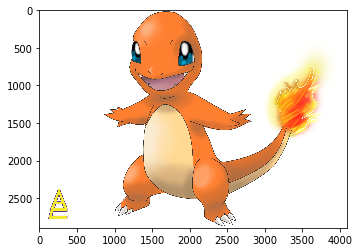

In [97]:
#no need in this project , just for watching our 300th image
i = plt.imread("Train/Images/"+images[300])
plt.imshow(i)

In [98]:
def dist(p1, p2):
    return np.sqrt(np.sum((p1-p2)**2))
def knn(x, y, query_point, k=5):
    m = x.shape[0]
    all_distance = []
    for i in range(m):
        d = dist(query_point, x[i])
        all_distance.append((d, y[i]))
    
    all_distance = sorted(all_distance)[0:k]
    all_distance = np.array(all_distance)[:,1]
    
    unique, freq = np.unique(all_distance, return_counts=True)
    freq = np.argmax(freq)
    return dic[int(unique[freq])]

In [103]:
for i in range(1):
    testimg = "Train/Images/"+images[i]
    testimg = cv2.imread(testimg)
    testimg = cv2.resize(testimg, (100,100))
    print(knn(X, Y, testimg))

Charmander


In [104]:
knn(X,Y, testimg)

'Charmander'